In [2]:
#-*-coding:utf-8-*-
import sys
import pandas as pd
import datetime
import math
import numpy as np

df = pd.read_csv("./dataset.csv",encoding='cp949')

In [3]:
# import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [5]:
import datetime
import math

def change_type(df_):
    contract_yr = []
    for i, j in np.array(df_[['계약년월', '계약일']]):
        contract_yr.append(datetime.datetime(int(str(i)[:4]), int(str(i)[4:6]), j))
    df_['계약년월_adj'] = contract_yr

    construct_yr =[]
    for i in np.array(df_['건축년도']):
        if(math.isnan(i)):
            construct_yr.append(i)
        elif(i==0):
            construct_yr.append(np.nan)
        else:
            construct_yr.append(datetime.datetime(int(str(int(i))[:4]),1,1))

    df_['건축년도_adj']=construct_yr

    #거래금액 to float64
    df_['거래금액(만원)_adj']=df_['거래금액(만원)'].str.replace(',', '').astype('float64')
    
    return df_

df = change_type(df)
df.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,367.3,"550,000",NaN,201708,23,1993.0,2017-08-23,1993-01-01,550000.0
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,207.8,"390,000",NaN,201708,29,1987.0,2017-08-29,1987-01-01,390000.0
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,NaN,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,NaN,"60,000",NaN,201709,14,1984.0,2017-09-14,1984-01-01,60000.0
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,NaN,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0


In [41]:
for i in df.columns :
    X_i = df.loc[:,i].replace('-', np.nan) # 도로조건은 -가 null 값 (데이터를 출력하여 확인 필요)
    print("column {} : {} not null ratio".format(i,X_i.dropna().shape[0]/df.shape[0]))
    print(df.loc[:,i].unique())
    print("")
    print()

column 시군구 : 1.0 not null ratio
['서울특별시강남구개포동' '서울특별시강남구논현동' '서울특별시강남구대치동' '서울특별시강남구도곡동' '서울특별시강남구삼성동'
 '서울특별시강남구세곡동' '서울특별시강남구수서동' '서울특별시강남구신사동' '서울특별시강남구압구정동' '서울특별시강남구역삼동'
 '서울특별시강남구일원동' '서울특별시강남구자곡동' '서울특별시강남구청담동' '서울특별시강동구강일동' '서울특별시강동구고덕동'
 '서울특별시강동구길동' '서울특별시강동구둔촌동' '서울특별시강동구명일동' '서울특별시강동구상일동' '서울특별시강동구성내동'
 '서울특별시강동구암사동' '서울특별시강동구천호동' '서울특별시강북구미아동' '서울특별시강북구번동' '서울특별시강북구수유동'
 '서울특별시강북구우이동' '서울특별시강서구가양동' '서울특별시강서구공항동' '서울특별시강서구내발산동' '서울특별시강서구등촌동'
 '서울특별시강서구마곡동' '서울특별시강서구방화동' '서울특별시강서구염창동' '서울특별시강서구화곡동' '서울특별시관악구남현동'
 '서울특별시관악구봉천동' '서울특별시관악구신림동' '서울특별시광진구광장동' '서울특별시광진구구의동' '서울특별시광진구군자동'
 '서울특별시광진구능동' '서울특별시광진구자양동' '서울특별시광진구중곡동' '서울특별시광진구화양동' '서울특별시구로구가리봉동'
 '서울특별시구로구개봉동' '서울특별시구로구고척동' '서울특별시구로구구로동' '서울특별시구로구궁동' '서울특별시구로구신도림동'
 '서울특별시구로구오류동' '서울특별시구로구온수동' '서울특별시구로구천왕동' '서울특별시구로구항동' '서울특별시금천구가산동'
 '서울특별시금천구독산동' '서울특별시금천구시흥동' '서울특별시노원구공릉동' '서울특별시노원구상계동' '서울특별시노원구월계동'
 '서울특별시노원구중계동' '서울특별시노원구하계동' '서울특별시도봉구도봉동' '서울특별시도봉구방학동' '서울특별시도봉구쌍문동'
 '서울특별시도봉구창동' '서울특별시동대문구답십리동' '서울특별시동대문구신설동' '

In [42]:
df_1 = df.copy()

def handling_nan(df_):
    #1 대지면적 열 삭제
    df_ = df_.drop(['대지면적(㎡)'],axis=1)
    print("(데이터 수, 변수) =",df_.shape)
    #2 '층'과 '도로조건' 비어있는 값들을 최빈값 대체
    df_ = df_.replace({'층': np.nan}, {'층': df_['층'].mode()[0]})
    df_ = df_.replace({'도로조건': np.nan}, {'도로조건': df_['도로조건'].mode()[0]})
    print("(데이터 수, 변수) =",df_.shape)
    #3 건축년도 비어있는 행 제거 : 
    df_ = df_.dropna(subset=['건축년도'])
    print("(데이터 수, 변수) =",df_.shape)
    #4 주요변수 전부 헨들링 되었으므로 그 외 nan이 존재하는 행은 드랍
    df_ = df_.dropna()
    print("(데이터 수, 변수) =",df_.shape)
    return df_

df_1 = handling_nan(df_1)

(데이터 수, 변수) = (46874, 16)
(데이터 수, 변수) = (46874, 16)
(데이터 수, 변수) = (46058, 16)
(데이터 수, 변수) = (46032, 16)


In [43]:
### Column이 한글이면 에러가 발생할 수 있으므로 영문으로 사용하는 것을 추천 (아래 코드는 한글 폰트 사용)
### 각 plot 함수는 dataframe과 columns을 인풋으로 받아서 변수의 그림 출력
### plotHistogram은 histogram, plotPairplot은 컬럼별 scatter plot, plotBoxplot은 기준 컬럼(범주형 변수)에 대한 box plot
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()
        
        
def plotPairplot(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    sns.pairplot(_df.loc[:,columns])
    plt.show()

        
def plotBoxplot(_df, basis_col1, y_col2):
    _unique = _df.loc[:, basis_col1].unique()
    if len(_unique) < 50:
        print("기준 컬럼의 종류가 너무 많습니다.(50개 이상)")
    
    box_plot=[]
    count_ = []
    for n,i in enumerate(_unique):
        box_plot.append(list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))
        count_.append(len((list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))))

    print('Count   ',count_)
    plt.boxplot(box_plot, flierprops=dict(markerfacecolor='g', marker='D'));
    plt.xticks(range(1,len(_unique)+1),_unique)

In [44]:
#plotBoxplot(df_1, '층', '거래금액(만원)_adj')

In [45]:
#plotHistogram(df_1, ['전용/연면적(㎡)', '층', '계약일'])

In [46]:
#plotPairplot(df_1, ['거래금액(만원)_adj', '전용/연면적(㎡)', '층', '계약일'])

In [47]:
#################################################################################
# TODO: 합리적인 방법으로 이상치 값을 처리하고 산점도의 변화 확인               #
#                                                                               #
# 1. 1%의 이상치를 모두 제거, 층은 큰값 1%제거, 건축년도는 작은값 1% 제거       #
#  (np.where 사용)
# 2. 도로조건 '-' 제거                                                          #
#################################################################################
df_2 = df_1.copy()

def remove_outliers(df_):
    #1 %의 이상치를 모두 제거, 층은 큰값 1%제거, 건축년도는 작은값 1% 제거
    lb_1, ub_1 = np.percentile(df_['전용/연면적(㎡)'],[1,99])
    lb_2, ub_2 = np.percentile(df_['층'],[1,99])
    lb_3, ub_3 = np.percentile(df_['건축년도'],[1,99])
    lb_4, ub_4 = np.percentile(df_['거래금액(만원)_adj'],[1,99])

    outliers = np.where((df_['전용/연면적(㎡)']<lb_1)|(df_['전용/연면적(㎡)']>ub_1)
                        |(df_['층']>ub_2)
                        |(df_['건축년도']<lb_3)
                        |(df_['거래금액(만원)_adj']<lb_4)|(df_['거래금액(만원)_adj']>ub_4))
    df_ = df_.drop(df_.index[outliers[0]])
    df_ = df_[df_['도로조건'] != '-']
    #df_[~df_['도로조건'].isin(['-'])]

    return df_

df_2 = remove_outliers(df_2)

print("(데이터 수, 변수) =",df_2.shape)
# 위 df_2를 기반으로 작성할 것
# 층은 큰값 1% 제거, 건축년도는 작은값 1% 

(데이터 수, 변수) = (42596, 16)


In [48]:
#################################################################################
# TODO: 예측의 유의미한 영향을 미칠 수 있는 파생변수 생성                       #
# - 건물가격을 바로 예측할 수 있지만, 평당가격을 예측하는 모델을 만들어 전용면적에
# 곱하여 사용하도록 모델 설계. (DataFrame.apply 사용)                                                                            
# 1. 지역구 단위의 행정구역 새로운 변수 생성 (변수명 '지역구') '서울특별시XX구' or '서울특별시 XX구 ', '구로구' 등 예외처리
# 2. 건물 년식 일 단위로 하여 새로운 변수 생성 (변수명 '건물년식') 
# 3. 평당가격 변수 추가 
# 4. 그 외의 합리적인 새로운 파생변수 생성                                
#################################################################################
df_3 = df_2.copy()
#######################Pyeong_1 = 3.305785
Pyeong_1 = 1

def cal_days(start, end):
    return (start-end).days

import re

def parse_road(string):
    part = string.partition('로')
    road_ =  part[0]+part[1]
    p = re.compile("[^0-9]")
    return ("".join(p.findall(road_)))

def new_variable(df_):
#1 지역구 단위의 행정구역 새로운 변수 생성 (변수명 '지역구') '서울특별시XX구' or '서울특별시 XX구 ', '구로구' 등 예외처리
    address_ = []
    for i in df_.loc[:, '시군구']:
        index1_ = i.find('서울특별시')
        if i.find('구로구') != -1 :
            index2_ = i.find('구로구')
            address_.append(i[index1_ + 5 : index2_+3].strip())
        else :
            index2_ = i.find('구')
            address_.append(i[index1_ + 5 : index2_+1].strip())
    df_.loc[:, '지역구'] = address_

#2 건물 년식 일 단위로 하여 새로운 변수 생성 (변수명 '건물년식') 
    df_['건물년식'] = df_.apply(lambda x : cal_days(x['계약년월_adj'],x['건축년도_adj']),axis=1)

#3 평당가격 변수 추가 
    df_['평당가격'] = df_['거래금액(만원)_adj']/(df_['전용/연면적(㎡)']/Pyeong_1)

# 4. 그 외의 합리적인 새로운 파생변수 생성
#도로명의 양식을 통일한 '도로명_adj' 변수 생성
# 도로명의 양식 통일화. xxx로xx길은 xxx로로 변경, xxx(숫자)길은 xxx길로 변경
#4.19로는 따로 조건문을 통해 원상복귀
    df_ = df_[df_['도로명'] != '-']
    df_['도로명_adj'] = df_['도로명'].apply(lambda x : parse_road(x))
    road_adj =[]
    for i in np.array(df_['도로명_adj']):
        if(i=='.로'):
            road_adj.append('4.19로')
        else:
            road_adj.append(i)
    df_['도로명_adj'] = road_adj
    
# 지역구+도로명 주소 파생변수 생성
    df_['지역구_도로명'] = df_['지역구'] +' '+ df_['도로명_adj']
    
    return df_
                                     
df_3 = new_variable(df_3)

# df_3를 사용하여 작성할 것

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [49]:
df_3

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,...,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj,지역구,건물년식,평당가격,도로명_adj,지역구_도로명
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,"550,000",1.0,...,23,1993.0,2017-08-23,1993-01-01,550000.0,강남구,9000,1441.979970,논현로,강남구 논현로
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,"390,000",1.0,...,29,1987.0,2017-08-29,1987-01-01,390000.0,강남구,11198,728.699552,선릉로,강남구 선릉로
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,...,4,1997.0,2017-09-04,1997-01-01,39500.0,강남구,7551,2239.229025,개포로,강남구 개포로
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,"60,000",1.0,...,14,1984.0,2017-09-14,1984-01-01,60000.0,강남구,12310,725.513906,개포로,강남구 개포로
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,...,27,1983.0,2017-09-27,1983-01-01,15000.0,강남구,12688,1666.666667,개포로,강남구 개포로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46869,서울특별시 중랑구 중화동,일반,3**,동일로,준주거,제1종근린생활,25m이상,676.04,"445,585",1.0,...,29,1977.0,2020-05-29,1977-01-01,445585.0,중랑구,15854,659.110408,동일로,중랑구 동일로
46870,서울특별시 중랑구 중화동,일반,3**,중랑천로,제2종일반주거,숙박,25m미만,446.40,"217,000",1.0,...,11,1983.0,2020-06-11,1983-01-01,217000.0,중랑구,13676,486.111111,중랑천로,중랑구 중랑천로
46871,서울특별시 중랑구 중화동,집합,2**,망우로,준주거,제1종근린생활,25m이상,34.88,"61,500",1.0,...,24,2010.0,2020-06-24,2010-01-01,61500.0,중랑구,3827,1763.188073,망우로,중랑구 망우로
46872,서울특별시 중랑구 중화동,집합,3**,중랑역로9길,제2종일반주거,제2종근린생활,8m미만,47.78,"15,000",1.0,...,29,2018.0,2020-06-29,2018-01-01,15000.0,중랑구,910,313.938887,중랑역로,중랑구 중랑역로


In [50]:
#CATEGORICAL = ['용도지역', '건축물주용도', '도로조건','지역구']
#df_4 = df_3.loc[:,[ '전용/연면적(㎡)', '층', '건물년식', '평당가격', '거래금액(만원)_adj']]

In [51]:
#################################################################################
# TODO:범주형 변수 처리                                                         #
#                                                                               #
# 범주형 변수를 Onehot encoding (Pandas.get_dummies 사용)                       #
# 변수의 종류당 하나의 dimension이 생기므로 차원이 매우 커짐. 따라서 해결할 수  #
# 있는 여러 존재하는데, 의미를 해석하여 ordinal하게 변수를 정의하거나 차원을    #
# 축소하는 PCA 알고리즘 등이 존재
# Ordinal 예시 : '용도지역'의 경우 평당 가격이 
# 상업지역 > ... > 준주거 > ... > 개발제한구역 이므로 이를 오름차순의 값으로 설정
#################################################################################
#for i in CATEGORICAL :
#    cate_i = pd.get_dummies(df_3.loc[:, i])
#    df_4[cate_i.columns] = cate_i

In [52]:
def set_cate(df_):  
    df_road_mean = pd.DataFrame(df_['평당가격'].groupby(df_['도로조건']).mean())
    df_road_std = pd.DataFrame(df_['평당가격'].groupby(df_['도로조건']).std())
    df_usageloc_mean = pd.DataFrame(df_['평당가격'].groupby(df_['용도지역']).mean())
    df_usageloc_std = pd.DataFrame(df_['평당가격'].groupby(df_['용도지역']).std())
    df_usagebuilding_mean = pd.DataFrame(df_['평당가격'].groupby(df_['건축물주용도']).mean())
    df_usagebuilding_std = pd.DataFrame(df_['평당가격'].groupby(df_['건축물주용도']).std())
    df_location_mean = pd.DataFrame(df_['평당가격'].groupby(df_['지역구']).mean())
    df_location_std = pd.DataFrame(df_['평당가격'].groupby(df_['지역구']).std())
    df_roadloc_mean = pd.DataFrame(df_['평당가격'].groupby(df_['지역구_도로명']).mean())
    df_roadloc_std = pd.DataFrame(df_['평당가격'].groupby(df_['지역구_도로명']).std())

    df_list = [df_road_mean, df_road_std, df_usageloc_mean, df_usageloc_std,
              df_usagebuilding_mean, df_usagebuilding_std, df_location_mean, df_location_std,df_roadloc_mean,df_roadloc_std]
    col_list = ['road_mean','road_std','usageloc_mean','usageloc_std',
                   'usagebuilding_mean','usagebuilding_std','location_mean','location_std','df_roadloc_mean','df_roadloc_std']
    left_list = ['도로조건','도로조건','용도지역','용도지역',
                    '건축물주용도','건축물주용도','지역구','지역구','지역구_도로명','지역구_도로명']

    for dfl,left,col in zip(df_list,left_list,col_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format(left), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
    
    return df_

In [53]:
CATEGORICAL = ['용도지역', '건축물주용도', '도로조건','지역구']
df_4 = df_3.loc[:,[ '전용/연면적(㎡)', '층', '건물년식', '평당가격', '거래금액(만원)_adj']]

In [54]:
for i in CATEGORICAL :
    cate_i = pd.get_dummies(df_3.loc[:, i])
    df_4[cate_i.columns] = cate_i

In [55]:
df_4

,전용/연면적(㎡),층,건물년식,평당가격,거래금액(만원)_adj,개발제한구역,근린상업,유통상업,일반상업,자연녹지,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,381.42,1.0,9000,1441.979970,550000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,535.20,1.0,11198,728.699552,390000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.64,1.0,7551,2239.229025,39500.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,82.70,1.0,12310,725.513906,60000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.00,1.0,12688,1666.666667,15000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46869,676.04,1.0,15854,659.110408,445585.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46870,446.40,1.0,13676,486.111111,217000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46871,34.88,1.0,3827,1763.188073,61500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46872,47.78,1.0,910,313.938887,15000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df_4.dtypes

전용/연면적(㎡)       float64
층               float64
건물년식              int64
평당가격            float64
거래금액(만원)_adj    float64
개발제한구역            uint8
근린상업              uint8
유통상업              uint8
일반상업              uint8
자연녹지              uint8
제1종일반주거           uint8
제1종전용주거           uint8
제2종일반주거           uint8
제2종전용주거           uint8
제3종일반주거           uint8
준공업               uint8
준주거               uint8
중심상업              uint8
교육연구              uint8
기타                uint8
숙박                uint8
업무                uint8
제1종근린생활           uint8
제2종근린생활           uint8
판매                uint8
12m미만             uint8
25m미만             uint8
25m이상             uint8
8m미만              uint8
강남구               uint8
강동구               uint8
강북구               uint8
강서구               uint8
관악구               uint8
광진구               uint8
구로구               uint8
금천구               uint8
노원구               uint8
도봉구               uint8
동대문구              uint8
동작구               uint8
마포구             

In [ ]:
#df_4 = df_3.loc[:,['전용/연면적(㎡)', '층', '건물년식', '평당가격', '거래금액(만원)_adj',
#                   '용도지역','건축물주용도', '도로조건','지역구','지역구_도로명']]

In [ ]:
#df_4 = set_cate(df_4)

In [ ]:
#df_4.to_csv('new_data.csv',encoding='cp949')

In [24]:
# 연속형 변수 컬럼
cont_col_includeY = ['전용/연면적(㎡)', '층', '건물년식',  '평당가격_by_road_mean', '평당가격_by_road_std',
       '평당가격_by_usageloc_mean', '평당가격_by_usageloc_std',
       '평당가격_by_usagebuilding_mean', '평당가격_by_usagebuilding_std',
       '평당가격_by_location_mean', '평당가격_by_location_std',
       '평당가격_by_df_roadloc_mean', '평당가격_by_df_roadloc_std','평당가격']


cont_col = ['전용/연면적(㎡)', '층', '건물년식',  '평당가격_by_road_mean', '평당가격_by_road_std',
       '평당가격_by_usageloc_mean', '평당가격_by_usageloc_std',
       '평당가격_by_usagebuilding_mean', '평당가격_by_usagebuilding_std',
       '평당가격_by_location_mean', '평당가격_by_location_std',
       '평당가격_by_df_roadloc_mean', '평당가격_by_df_roadloc_std']


In [25]:
def splitData(df, ratio, y_column):
    
    columns_ = df.columns
    # Subsample the data
    mask = list(range(0,df.shape[0], ratio))
    X_val = df.iloc[mask, :].drop(y_column, 1)
    y_val = df.iloc[mask][y_column]
    
    mask = ~df.index.isin(mask)
    X_train = df.loc[mask, :].drop(y_column, 1)
    y_train = df.loc[mask, y_column]
    
    return X_train, y_train, X_val, y_val

# train set, validation set split 
# train set, validation set = 4 : 1


X_train, y_train, X_val, y_val = splitData(df_.loc[:,cont_col_includeY], 5, y_column = '평당가격') 


#################################################################################
# TODO: 연속형 변수에 대해서 Z normalize를 설계 및 적용                         #
# 대표적으로 Z normalize와 min max normalize가 존재 
# 이번에는 Z-normalize를 사용!!
#
# 1. training dataset에 normalize하는 함수 생성(validation/ test에 사용할 cache 
# 저장)
# 2. validation set과 test set을 normalize하는 함수 생성 및 적용
#################################################################################

#def z_normalize(df, columns):
#  if sum(df.loc[:,columns].std()==0)!=0:
#    print("하나의 값만 존재하는 컬럼이 있음")
#    return
#  cache = {}
#  cache['mean'] = df.loc[:,columns].mean(axis=0)
#  cache['std']=df.loc[:,columns].std(axis=0)
#
#  return (df.loc[:,columns]-df.loc[:,columns].mean(axis=0))/df.loc[:columns].std(axis=0),cache

def z_normalize(df_, columns):
    if sum(df_.loc[:,columns].std()==0) !=0:
        print(":하나의 값만 존재하는 컬럼이 있음")
        return
    cache = {}
    cache['mean'] = df_.loc[:,columns].mean(axis=0)
    cache['std'] = df_.loc[:,columns].std(axis=0)
    
    return (df_.loc[:,columns] - df_.loc[:,columns].mean(axis=0))/(df_.loc[:,columns].std(axis=0)), cache 

def z_normalize_val(df, columns , cache):
  return(df.loc[:,columns]-cache['mean'])/cache['std']

NameError: name 'df_' is not defined

In [ ]:
# 연속형 변수 컬럼
cont_col_includeY = ['전용/연면적(㎡)', '층', '건물년식',  '평당가격_by_road_mean', '평당가격_by_road_std',
       '평당가격_by_usageloc_mean', '평당가격_by_usageloc_std',
       '평당가격_by_usagebuilding_mean', '평당가격_by_usagebuilding_std',
       '평당가격_by_location_mean', '평당가격_by_location_std',
       '평당가격_by_df_roadloc_mean', '평당가격_by_df_roadloc_std','평당가격']


cont_col = ['전용/연면적(㎡)', '층', '건물년식',  '평당가격_by_road_mean', '평당가격_by_road_std',
       '평당가격_by_usageloc_mean', '평당가격_by_usageloc_std',
       '평당가격_by_usagebuilding_mean', '평당가격_by_usagebuilding_std',
       '평당가격_by_location_mean', '평당가격_by_location_std',
       '평당가격_by_df_roadloc_mean', '평당가격_by_df_roadloc_std']


In [30]:
##############################normalize
def z_normalize(df_, columns):
    if sum(df_.loc[:,columns].std()==0) !=0:
        print(":하나의 값만 존재하는 컬럼이 있음")
        return
    cache = {}
    cache['mean'] = df_.loc[:,columns].mean(axis=0)
    cache['std'] = df_.loc[:,columns].std(axis=0)
    
    return (df_.loc[:,columns] - df_.loc[:,columns].mean(axis=0))/(df_.loc[:,columns].std(axis=0)), cache

In [31]:
def z_normalize_val(df_,columns,cache):
    return (df_.loc[:,columns]-cache['mean'])/cache['std']

In [32]:
x_train_norm = x_train.copy()
x_train_norm.loc[:,['전용/연면적(㎡)','층', '건물년식']], cache = z_normalize(x_train,['전용/연면적(㎡)', '층', '건물년식'])
x_val_norm = x_val.copy()
x_val_norm.loc[:,['전용/연면적(㎡)', '층', '건물년식']] = z_normalize_val(x_val,['전용/연면적(㎡)', '층', '건물년식'],cache)

In [33]:
###########################random forest
from sklearn.ensemble import RandomForestRegressor
best_rf = None
best_mse = 1e10
best_hyperparameter = None
results = {}
n_estimators = [50,100,150]
max_depths = [100,200,300]
ects = None

In [37]:
for i in n_estimators:
    for j in max_depths:
        regr = RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j)
        regr.fit(x_train,y_train)
        predicted = regr.predict(x_val)
        mse = np.mean(np.square(predicted-y_val))
        print('n_estimator : ',i,' max_depth : ',j)
        print('Validation MSE(㎡당 가격): ',mse)
        print('Validation MAE(㎡당 가격): ',np.mean(np.abs(predicted-y_val)))
        
        _price = x_val.loc[:, '전용/연면적(㎡)'] * predicted
        y_price = x_val.loc[:, '전용/연면적(㎡)'] * y_val
        
        print('Validation MSE(거래금액): ',np.mean(np.square(_price-y_price)))
        print('Validation MAE(거래금액): ',np.mean(np.abs(_price-y_price)))
        
        if mse < best_mse:
            best_mse = mse
            best_rf = regr
            best_parameter = ['n_estimator : '+str(i),'max_depth : '+str(j)]

n_estimator :  50  max_depth :  100
Validation MSE(㎡당 가격):  919.5324639405962
Validation MAE(㎡당 가격):  5.862765959578666
Validation MSE(거래금액):  16608449.353056926
Validation MAE(거래금액):  780.4351254715962
n_estimator :  50  max_depth :  200
Validation MSE(㎡당 가격):  711.945937897346
Validation MAE(㎡당 가격):  5.560798725935732
Validation MSE(거래금액):  16761963.82455423
Validation MAE(거래금액):  765.6039542941119
n_estimator :  50  max_depth :  300
Validation MSE(㎡당 가격):  740.9575318356528
Validation MAE(㎡당 가격):  5.531658593236652
Validation MSE(거래금액):  17635304.052022833
Validation MAE(거래금액):  752.7756355666493
n_estimator :  100  max_depth :  100
Validation MSE(㎡당 가격):  722.4876472734292
Validation MAE(㎡당 가격):  5.145277168146069
Validation MSE(거래금액):  13451577.798558144
Validation MAE(거래금액):  678.4970984859357
n_estimator :  100  max_depth :  200
Validation MSE(㎡당 가격):  585.1521517187655
Validation MAE(㎡당 가격):  5.07077082521244
Validation MSE(거래금액):  11856958.708337104
Validation MAE(거래금액):  671.

In [39]:
best_rf.fit(x_train,y_train)
predicted = best_rf.predict(x_val)

print('Validation MSE(㎡당 가격): ',mse)
print('Validation MAE(㎡당 가격): ',np.mean(np.abs(predicted-y_val)))

_price = x_val.loc[:, '전용/연면적(㎡)'] * predicted
y_price = x_val.loc[:, '전용/연면적(㎡)'] * y_val

print('Validation MSE(거래금액): ',np.mean(np.square(_price-y_price)))
print('Validation MAE(거래금액): ',np.mean(np.abs(_price-y_price)))
print('Best parameters : ',best_parameter)

Validation MSE(㎡당 가격):  672.5806237971893
Validation MAE(㎡당 가격):  5.205162465810115
Validation MSE(거래금액):  13874913.87264367
Validation MAE(거래금액):  689.2153190109793
Best parameters :  ['n_estimator : 100', 'max_depth : 200']


In [43]:
def plot_feature_importance(importance_, features_, model_type):
    dict_ = {'feature importance':importance_,'features':features_}
    df = pd.DataFrame(dict_)
    df.sort_values(by=['feature importance'],ascending=False,inplace=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x=df['feature importance'],y=df['features'])
    plt.title(model_type+'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:2

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backen

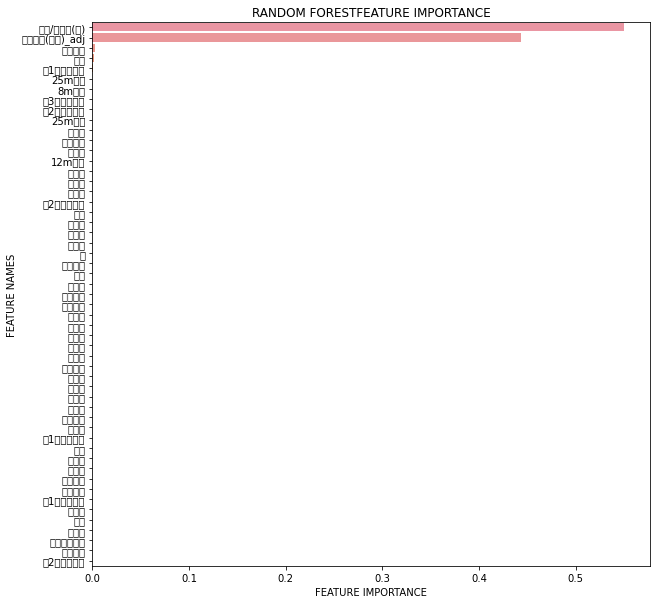

In [44]:
plot_feature_importance(best_rf.feature_importances_, x_val.columns,'RANDOM FOREST')